In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [88]:
data=pd.read_csv('Tarkari.csv')
data

C:\Users\nirvi\AppData\Local\Temp\ipykernel_27420\1785774419.py:1: DtypeWarning:

Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.



,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,Potato Red,6/16/2013,Kg,20,21,20.5
3,Potato White,6/16/2013,Kg,15,16,15.5
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0
...,...,...,...,...,...,...
280857,Tomato Small(Indian),9/28/2023,KG,Rs 45.00,Rs 55.00,Rs 50.00
280858,Tomato Small(Local),9/28/2023,KG,Rs 50.00,Rs 60.00,Rs 55.00
280859,Tomato Small(Tunnel),9/28/2023,KG,Rs 60.00,Rs 75.00,Rs 69.00
280860,Turnip A,9/28/2023,KG,Rs 70.00,Rs 80.00,Rs 75.00


In [89]:
pattern = r"^Rs\s+"
data["Average"] = pd.to_numeric(data["Average"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(r"^Rs\s+", "", str(x))))

In [90]:
data1=data[data['Commodity']=='Onion Dry (Indian)']
data1

,Commodity,Date,Unit,Minimum,Maximum,Average
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.00
78,Onion Dry (Indian),6/17/2013,Kg,29,30,29.50
151,Onion Dry (Indian),6/18/2013,Kg,33,35,34.00
224,Onion Dry (Indian),6/19/2013,Kg,34,35,34.50
297,Onion Dry (Indian),6/20/2013,Kg,35,36,35.50
...,...,...,...,...,...,...
280447,Onion Dry (Indian),9/24/2023,KG,Rs 64.00,Rs 70.00,66.33
280541,Onion Dry (Indian),9/25/2023,KG,Rs 68.00,Rs 70.00,69.20
280637,Onion Dry (Indian),9/26/2023,KG,Rs 68.00,Rs 70.00,69.20
280731,Onion Dry (Indian),9/27/2023,KG,Rs 70.00,Rs 74.00,71.20


In [91]:
data2=data1.drop(['Commodity','Unit','Minimum','Maximum'],axis=1)
data2

,Date,Average
4,6/16/2013,29.00
78,6/17/2013,29.50
151,6/18/2013,34.00
224,6/19/2013,34.50
297,6/20/2013,35.50
...,...,...
280447,9/24/2023,66.33
280541,9/25/2023,69.20
280637,9/26/2023,69.20
280731,9/27/2023,71.20


In [92]:
data2=data2.reset_index()
data2

,index,Date,Average
0,4,6/16/2013,29.00
1,78,6/17/2013,29.50
2,151,6/18/2013,34.00
3,224,6/19/2013,34.50
4,297,6/20/2013,35.50
...,...,...,...
3577,280447,9/24/2023,66.33
3578,280541,9/25/2023,69.20
3579,280637,9/26/2023,69.20
3580,280731,9/27/2023,71.20


In [93]:
data2=data2.drop(['index'],axis=1)

data2

,Date,Average
0,6/16/2013,29.00
1,6/17/2013,29.50
2,6/18/2013,34.00
3,6/19/2013,34.50
4,6/20/2013,35.50
...,...,...
3577,9/24/2023,66.33
3578,9/25/2023,69.20
3579,9/26/2023,69.20
3580,9/27/2023,71.20


In [94]:
data2['Date']=pd.to_datetime(data2['Date'])
data5=data2.copy()
data2


,Date,Average
0,2013-06-16,29.00
1,2013-06-17,29.50
2,2013-06-18,34.00
3,2013-06-19,34.50
4,2013-06-20,35.50
...,...,...
3577,2023-09-24,66.33
3578,2023-09-25,69.20
3579,2023-09-26,69.20
3580,2023-09-27,71.20


In [95]:
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year
data2['day'] = data2['Date'].dt.day
data2

,Date,Average,month,year,day
0,2013-06-16,29.00,6,2013,16
1,2013-06-17,29.50,6,2013,17
2,2013-06-18,34.00,6,2013,18
3,2013-06-19,34.50,6,2013,19
4,2013-06-20,35.50,6,2013,20
...,...,...,...,...,...
3577,2023-09-24,66.33,9,2023,24
3578,2023-09-25,69.20,9,2023,25
3579,2023-09-26,69.20,9,2023,26
3580,2023-09-27,71.20,9,2023,27


In [96]:
train=data2.loc[0:3000]
test=data2.loc[3001:3191]

In [97]:
x_train=train[['month','year','day']]
y_train=train['Average']
x_test=test[['month','year','day']]
y_test=test['Average']

In [98]:
import sklearn
from sklearn.linear_model import LinearRegression

In [99]:
reg= LinearRegression().fit(x_train,y_train)
pred=reg.predict(x_test)

In [100]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
mape=mean_absolute_percentage_error(y_test,pred)
r2=r2_score(y_test,pred)
print(mape)
print(r2)

0.4667648953145848
-2.5443477219566035


In [101]:
pred

array([42.62163947, 42.65057975, 44.68039894, 44.70933921, 44.73827948,
       44.76721976, 44.79616003, 44.8251003 , 44.85404057, 44.88298085,
       44.91192112, 44.94086139, 44.96980166, 44.99874194, 45.02768221,
       45.05662248, 45.08556276, 45.11450303, 45.1434433 , 45.17238357,
       45.20132385, 45.23026412, 45.25920439, 45.28814466, 45.31708494,
       45.34602521, 45.37496548, 45.43284603, 45.4617863 , 47.57842631,
       47.60736658, 47.63630686, 47.6941874 , 47.72312767, 47.75206795,
       47.78100822, 47.80994849, 47.83888876, 47.86782904, 47.89676931,
       47.92570958, 47.95464986, 47.98359013, 48.0125304 , 48.04147067,
       48.07041095, 48.09935122, 48.12829149, 48.15723176, 48.18617204,
       48.21511231, 48.24405258, 48.27299285, 48.30193313, 48.3308734 ,
       48.35981367, 48.38875395, 48.41769422, 48.44663449, 50.47645368,
       50.50539396, 50.53433423, 50.5632745 , 50.59221477, 50.62115505,
       50.65009532, 50.67903559, 50.70797586, 50.73691614, 50.76

In [102]:
result=pd.DataFrame()

In [103]:
result['Date']=test['Date']
result['Actual']=test['Average']
result['Predticted']=pred
result

,Date,Actual,Predticted
3001,2022-01-30,58.0,42.621639
3002,2022-01-31,56.5,42.650580
3003,2022-02-01,56.5,44.680399
3004,2022-02-02,56.0,44.709339
3005,2022-02-03,55.0,44.738279
...,...,...,...
3187,2022-08-09,37.0,62.300085
3188,2022-08-10,37.0,62.329026
3189,2022-08-11,37.0,62.357966
3190,2022-08-12,37.0,62.386906


In [104]:
import plotly.express as pe

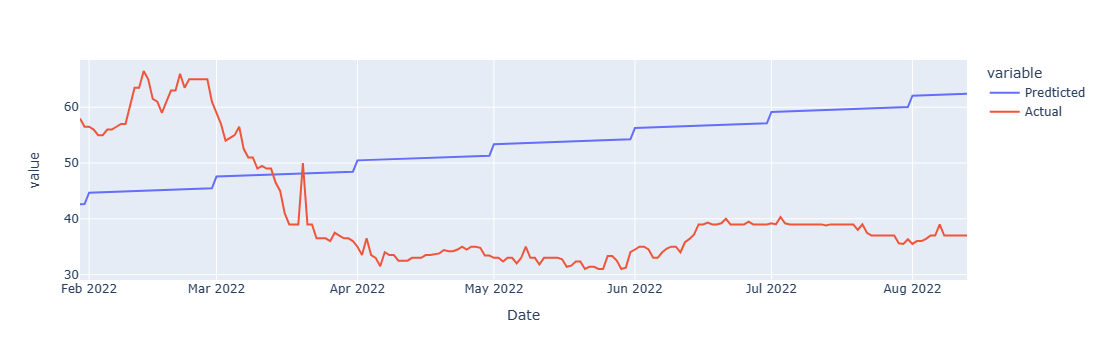

In [105]:
pe.line(result,x='Date',y=['Predticted','Actual'])

In [106]:
data5


,Date,Average
0,2013-06-16,29.00
1,2013-06-17,29.50
2,2013-06-18,34.00
3,2013-06-19,34.50
4,2013-06-20,35.50
...,...,...
3577,2023-09-24,66.33
3578,2023-09-25,69.20
3579,2023-09-26,69.20
3580,2023-09-27,71.20


data2

In [107]:
data3=data2.copy()

In [108]:
data3

,Date,Average,month,year,day
0,2013-06-16,29.00,6,2013,16
1,2013-06-17,29.50,6,2013,17
2,2013-06-18,34.00,6,2013,18
3,2013-06-19,34.50,6,2013,19
4,2013-06-20,35.50,6,2013,20
...,...,...,...,...,...
3577,2023-09-24,66.33,9,2023,24
3578,2023-09-25,69.20,9,2023,25
3579,2023-09-26,69.20,9,2023,26
3580,2023-09-27,71.20,9,2023,27


In [109]:
data5

,Date,Average
0,2013-06-16,29.00
1,2013-06-17,29.50
2,2013-06-18,34.00
3,2013-06-19,34.50
4,2013-06-20,35.50
...,...,...
3577,2023-09-24,66.33
3578,2023-09-25,69.20
3579,2023-09-26,69.20
3580,2023-09-27,71.20


In [110]:
data5_train=data5.loc[0:3000]
data5_test=data5.loc[3001:3191]

In [111]:
data5_train.set_index('Date',inplace=True)
data5_test.set_index('Date',inplace=True)

In [112]:
data5_test.shape

(191, 1)

In [113]:
order=(1,1,1)
seasonal_order=(1,1,1,12)

In [114]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#import ststsmodels.appi as sm
sarima_model=sm.tsa.SARIMAX(data5_train['Average'],order=order,seasonal_order=seasonal_order,enforce_stationarity=False)
sarima_result=sarima_model.fit()

In [ ]:
print(sarima_result.summary())

In [ ]:
forecast_steps=191
forecast=sarima_result.get_forecast(steps=forecast_steps)

In [ ]:
predicted_value=forecast.predicted_mean

In [ ]:
predicted_value

In [ ]:
predicted_value_reset=predicted_value.reset_index(drop=True).values
predicted_value_reset

In [ ]:
sre=pd.DataFrame()

In [ ]:
sre['Actual']=data5_test['Average']
sre['Pred']=predicted_value_reset
sre

In [ ]:
mape2=mean_absolute_percentage_error(sre['Actual'],sre['Pred'])
r22=r2_score(sre['Actual'],sre['Pred'])
print(mape2)
print(r22)

In [ ]:
pe.line(sre,x=sre.index,y=['Pred','Actual'])